In [3]:
import numpy as np
import control.matlab as m
import matplotlib.pyplot as plt

from pathlib import Path

IMAGES = Path('images')

# Questão 1

G(s) = 
    35
----------
13.5 s + 1



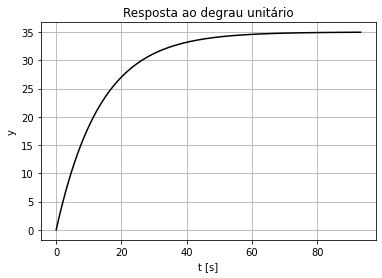

In [4]:
# Dados fornecidos
TD = 0 
T1 = 13.5
K  = 35

# Planta Contínua 
Gs = m.tf(K, [T1, 1])
print(f'G(s) = {Gs}')
 
y, t = m.step(Gs)
plt.plot(t,y, 'k')

plt.xlabel('t [s]')
plt.ylabel('y')
plt.title('Resposta ao degrau unitário')

plt.grid()
if not Path(IMAGES, 'step_response.png').exists():
    plt.savefig(f'{IMAGES}/step_response.png', dpi=720, format = 'png')
plt.show()

# Questão 2

Ts < 0.772 s
Ts = 1.157	->	Qte. de Pontos = 5
Ts = 0.772	->	Qte. de Pontos = 7
Ts = 0.54	->	Qte. de Pontos = 11
Ts = 0.394	->	Qte. de Pontos = 15
Ts = 0.385	->	Qte. de Pontos = 15
Ts = 0.077	->	Qte. de Pontos = 77


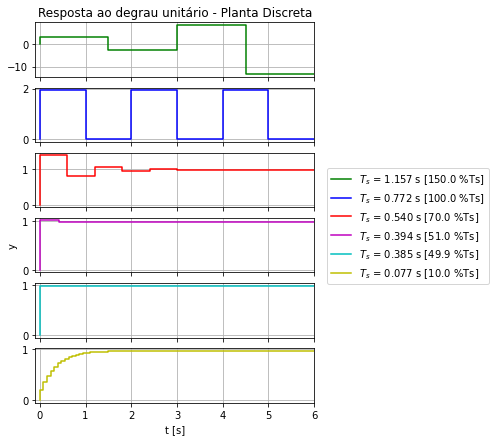

In [5]:
# Planta Discreta
a  = 1/13.5
Ts = -np.log((K-1)/(K+1))/a
print(f'Ts < {round(Ts,3)} s')

Tsvet = [1.5*Ts,Ts, 0.7*Ts, 0.51*Ts, 0.499*Ts, 0.1*Ts]
color = ['g','b','r','m', 'c','y']

plt.rcParams['figure.figsize'] = (5,7)
fig, axes = plt.subplots(len(Tsvet),1)

tfinal = 6
for i, ax in enumerate(axes):
    z = m.tf('z')
    Gz = K*(1 - np.exp(-a*Tsvet[i]))/(z - np.exp(-a*Tsvet[i]))
    Gzmf = m.feedback(Gz, 1)
    
    qteT = int(tfinal/Tsvet[i])
    T = np.linspace(0,tfinal,qteT) 
    y, t = m.step(Gzmf, T)

    ax.step(t,y,color[i],label = f'$T_s$ = {round(Tsvet[i],3):.3f} s [{round(100*Tsvet[i]/Ts,1)} %Ts]')
    ax.set_xlim([-.1,tfinal])
    if i==0: 
        ax.set_title('Resposta ao degrau unitário - Planta Discreta')
    if not i==len(axes)-1: 
        ax.set_xticklabels([])
    ax.grid()

    print(f'Ts = {round(Tsvet[i],3)}\t->\tQte. de Pontos = {len(t)}')


axes[-1].set_xlabel('t [s]')
axes[3].set_ylabel('y')
fig.legend(bbox_to_anchor = (1.4, 0.6))
if not Path(IMAGES, 'step_response_discrete.png').exists():
    fig.savefig(f'{IMAGES}/step_response_discrete.png', dpi=720, format = 'png', bbox_inches = 'tight')

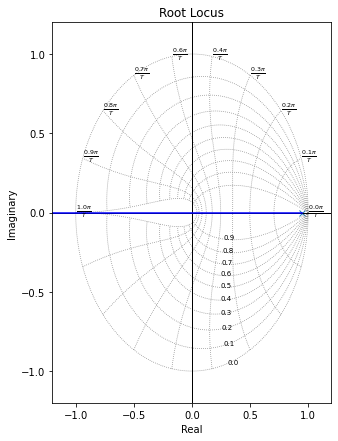

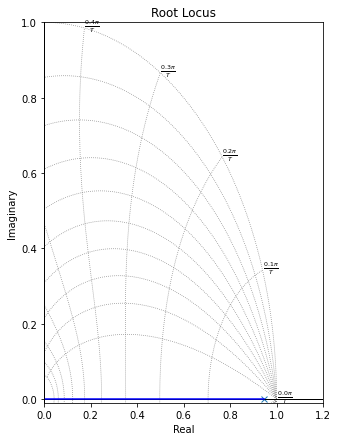

A planta e seu respectivo polo para Ts = 0.7716 s é:
G(z) = 
  1.944
----------
z - 0.9444

dt = 0.7716385868393066

z = [0.94444444+0.j]


In [7]:
Gz      = m.tf(K*(1 - np.exp(-a*Ts)), [1, -np.exp(-a*Ts)], Ts)
lim     = [-1.2,1.2]
lim2    = [0,1.2]
lim3    = [-0.01,1]

m.rlocus(Gz, grid = True, plotstr = 'b')
plt.gca().axis('auto')
plt.xlim(lim)
plt.ylim(lim)
if not Path(IMAGES, 'root_locus.png').exists():
    plt.savefig(f'{IMAGES}/root_locus.png', dpi=720, format = 'png')
plt.show()

m.rlocus(Gz, grid = True, plotstr = 'b')
plt.gca().axis('auto')
plt.xlim(lim2)
plt.ylim(lim3)
if not Path(IMAGES, 'root_locus2.png').exists():
    plt.savefig(f'{IMAGES}/root_locus2.png', dpi=720, format = 'png')
plt.show()

print(f'A planta e seu respectivo polo para Ts = {round(Ts,4)} s é:')
print(f'G(z) = {Gz}')
print(f'z = {m.pole(Gz)}')

# Questão 3